### Gráfica sección Estimación Incertidumbre

In [1]:
import numpy as np
g = 979.748
t = np.array([44,53,47,47,46,50,53])/100
t_mean = np.mean(t)
print('t_mean',t_mean)
t_diff = np.max(t)-np.min(t)
print('t_diff',t_diff)
t_e = 2*t_diff/(3*2)
print('t_e',t_e)
t_f = t_e/np.sqrt(len(t))
print('t_f',t_f)
error = np.std(t,ddof=1)/np.sqrt(len(t))
print('error',error)

print(0.5*g*t_mean**2)
print(0.5*g*(t_mean+t_f)**2)
print(0.5*g*(t_mean-t_f)**2)

t_mean 0.48571428571428577
t_diff 0.09000000000000002
t_e 0.03000000000000001
t_f 0.01133893419027682
error 0.013248026422136724
115.57027428571432
121.0292028747412
110.23731329668743


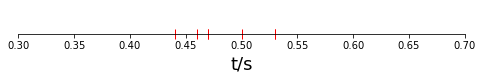

In [2]:
import matplotlib.pyplot as plt

fig, (ax1) = plt.subplots(1,1,figsize=(8,1))

data = np.copy(t)
eje = np.zeros(len(data))
ax1.plot(data,eje,'r|',ms=10)
ax1.set(yticklabels=[])  # remove the tick labels
ax1.tick_params(left=False)  # remove the ticks
ax1.set_xlabel('t/s',fontsize=18)
ax1.set_xlim(0.3,0.7)
#ax1.set_ylim(-1,1)

# use set_position
ax1.spines['top'].set_color('none')
ax1.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax1.spines['bottom'].set_position('zero')

plt.savefig('../docs/part2/imagenes/ejemplo-estIncertibumbre.png')
plt.show()

## Ejemplo sección Variable indirecta

In [3]:
import numpy as np
L = 1.20 # cm
eL = 0.03
Ls = np.array([L-eL,L+eL])
m = 50.0 # gramos
em = 0.1
ms = np.array([m-em,m+em])

# todas las posibilidades
rhos = []
for l1 in Ls:
    for m1 in ms:
            auxrho = m1/l1**3
            rhos.append(auxrho)
print('Todas las posibilidades en g/cm^3')
print(rhos)
print('Densidad máxima {} y densidad mínima \
      {}'.format(np.max(rhos),np.min(rhos)))


print('\nCon valores extremos:')
rhoM = (m+em)/(L+eL)**3
rhom = (m-em)/(L-eL)**3
print('Densidad máxima {} y densidad mínima \
      {}'.format(rhoM,rhom))

rho = m/L**3
errpro = abs(rhoM -rhom)/2
print('Incertidumbre promedio = {}'.format(errpro))

print('#Diferencia porcentual')
difmin = abs(np.min(rhos)-rhoM)/rhoM*100
difmax = abs(np.max(rhos)-rhom)/rhom*100
print('Dif máximos {} y dif mínimos \
      {}'.format(difmax,difmin))

print('\nUsando la propagación de errores:')
erho2rel = (em/m)**2 + 9*(eL/L)**2
erho = rho*np.sqrt(erho2rel)
print('Densidad máxima {} y densidad mínima \
      {}'.format(rho+erho,rho-erho))

print('Valor rho = {} g/cm^3'.format(rho))

Todas las posibilidades en g/cm^3
[31.156090765996534, 31.280964877283097, 26.81545752598117, 26.92293430965244]
Densidad máxima 31.280964877283097 y densidad mínima       26.81545752598117

Con valores extremos:
Densidad máxima 26.92293430965244 y densidad mínima       31.156090765996534
Incertidumbre promedio = 2.116578228172047
#Diferencia porcentual
Dif máximos 0.40080160320642266 y dif mínimos       0.3992015968063984

Usando la propagación de errores:
Densidad máxima 31.10609554188689 y densidad mínima       26.76427482848349
Valor rho = 28.93518518518519 g/cm^3


**Conclusión**: 
cada técnica arroja límites distintos, no obstante las diferencias son mínimas. Por ejemplo para el caso de mirar todas las posibilidades y mirar solo los extremos la diferencia fue inferior al 1 %. Se concluye que por practicidad se usará la técnica de los extremos.

## Ejemplo altura mesa: segunda parte

In [4]:
import numpy as np
L = 0.486 # s
eL = 0.011
Ls = np.array([L-eL,L+eL])
m = 979.748 # cm/s^2
em = 0.
ms = np.array([m-em,m+em])

# todas las posibilidades
rhos = []
for l1 in Ls:
    for m1 in ms:
            auxrho = 0.5*m1*l1**2
            rhos.append(auxrho)
print('Todas las posibilidades en cm')
print(rhos)
print('Alt máxima {} y Alt mínima \
      {}'.format(np.max(rhos),np.min(rhos)))


print('\nCon valores extremos:')
rhoM = 0.5*(m+em)*(L+eL)**2
rhom = 0.5*(m-em)*(L-eL)**2
print('Alt máxima {} y Alt mínima \
      {}'.format(rhoM,rhom))

rho = 0.5*m*L**2
errpro = abs(rhoM -rhom)/2
print('Incertidumbre promedio = {}'.format(errpro))
print('Valor alt = {} cm'.format(rho))

errrel = errpro/rho
print('Error relativo = {}'.format(errrel))

Todas las posibilidades en cm
[110.52782125, 110.52782125, 121.00328686600001, 121.00328686600001]
Alt máxima 121.00328686600001 y Alt mínima       110.52782125

Con valores extremos:
Alt máxima 121.00328686600001 y Alt mínima       110.52782125
Incertidumbre promedio = 5.237732808000004
Valor alt = 115.706279304 cm
Error relativo = 0.045267489711934186


## Ejemplo tablas y gráficas

En el experimento se pretende conocer como disminuye la velocidad de una bola de cristal rodando sobre una superficie de caucho. La velocidad inicial se obtiene con una rampa. La distancia se mide con una cinta métrica, el tiempo se extrae de los frames del video de 60 fps. El archivo es bola-rodadura.mp4. Para obtener una gráfica útil se grafica el intervalo temporal a partir de la primera toma, y se eliminar el tercer dato por ser muy sesgado.

ex = [2. 2. 2. 2. 4. 4. 4. 4. 4. 4. 4.]


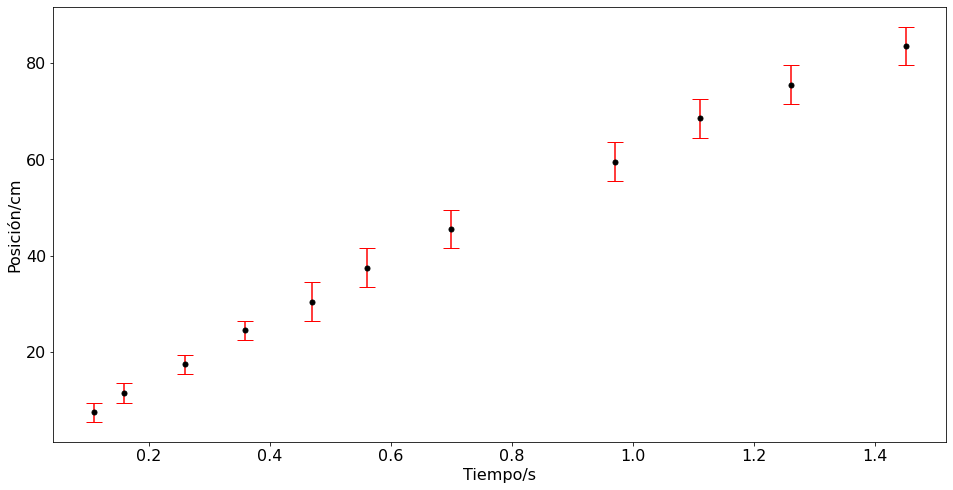

In [5]:
import numpy as np
import pylab as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 16})
# Datos tiempo y posición
"""
t = np.array([2.36,2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([13.0,17.0,21.0,27.0,33.5,40,47,55,69,77.5,85,93]) - 9.5 # posición en centímetros
ex = np.array([0.5,0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición
"""

t = np.array([2.43,2.48,2.58,2.68,2.79,2.88,3.02,3.29,3.43,3.58,3.77]) - 2.32 # tiempo en segundos
x = np.array([17.0,21.0,27.0,34,40,47,55,69,78,85,93]) - 9.5 # posición en centímetros
e = np.array([0.5,0.5,0.5,0.5,1,1,1,1,1,1,1])*2 # Error estimado en la posición

## Determinación del error del desplazamiento
despM = x + 2*e
despm = x - 2*e
ex = abs(despM - despm)/2
print('ex = {}'.format(ex))

plt.figure(figsize=(16,8))
plt.errorbar(t,x,yerr=ex,fmt='.',ms= 10,capsize=8,ecolor='r',color='k')
plt.ylabel('Posición/cm')
plt.xlabel('Tiempo/s')
plt.savefig('../docs/part3/imagenes/bola2.png',format='png')
plt.show()

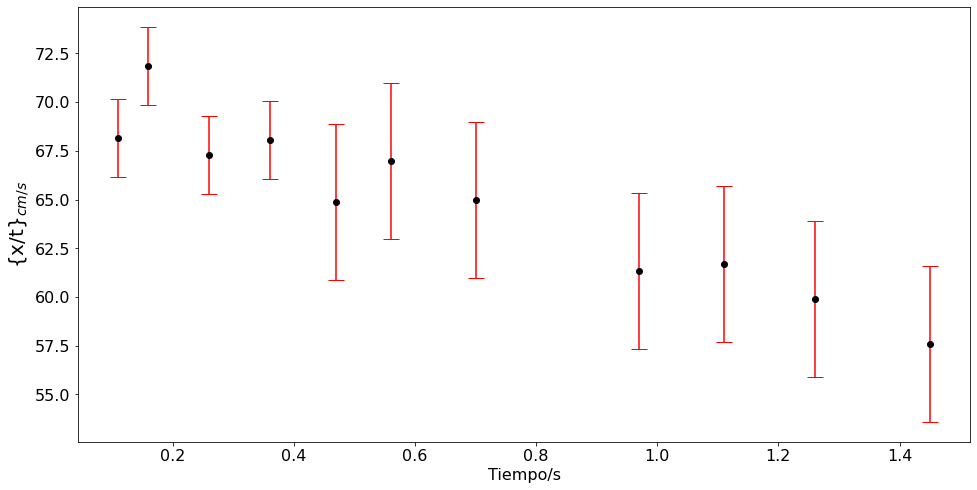

In [6]:
# Linearización suponiendo que sigue la forma x -x0 = v0t -at^2

xnt = (x)/t
exnt = ex

plt.figure(figsize=(16,8))
plt.errorbar(t,xnt,yerr=exnt,fmt='.',ms=12,capsize=8,ecolor='r',color='k')
plt.ylabel('{x/t}$_{cm/s}$',fontsize=20)
plt.xlabel('Tiempo/s')
plt.savefig('../docs/part3/imagenes/bola3.png',format='png')
plt.show()

pendiente = -8.772415597184395 +/- 0.927183470438874
intercepto = 70.7127570972936 +/- 0.746080290006485
Incertidumbre común = 1.3534511430148493


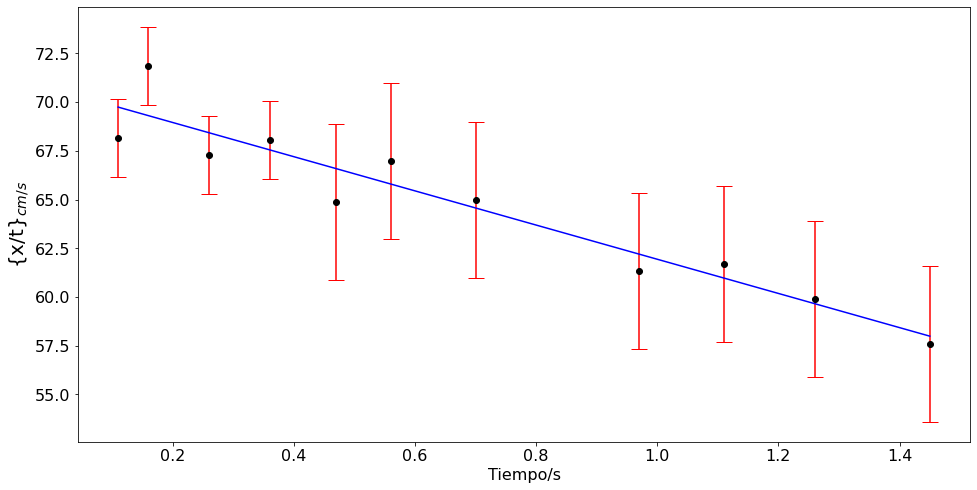

In [7]:
## Mínimos cuadrados
N = len(t)
Sumax = np.sum(t)
Sumay = np.sum(xnt)
Sumax2 = np.sum(t**2)
Sumaxy = np.sum(t*xnt)
Delta = N*Sumax2-Sumax**2
c = (Sumax2*Sumay - Sumax*Sumaxy)/Delta
m = (N*Sumaxy - Sumax*Sumay)/Delta
eCU = np.sqrt((1/(N-2))*np.sum((xnt-m*t-c)**2))
ec = eCU*np.sqrt(Sumax2/Delta)
em = eCU*np.sqrt(N/Delta)

print('pendiente = {} +/- {}'.format(m,em))
print('intercepto = {} +/- {}'.format(c,ec))
print('Incertidumbre común = {}'.format(eCU))

plt.figure(figsize=(16,8))
plt.errorbar(t,xnt,yerr=exnt,fmt='.',ms= 12,capsize=8,ecolor='r',color='k')
plt.plot(t,c + m*t,'b-')
plt.ylabel('{x/t}$_{cm/s}$',fontsize=20)
plt.xlabel('Tiempo/s')
plt.savefig('../docs/part3/imagenes/bola4.png',format='png')
plt.show()

## Ejemplo histogramas
El primer ejemplo consiste en medir el diámetro de una muestra de canicas.

El diámetro promedio es 16.2 mm con una desviación estándar de 0.3 mm.


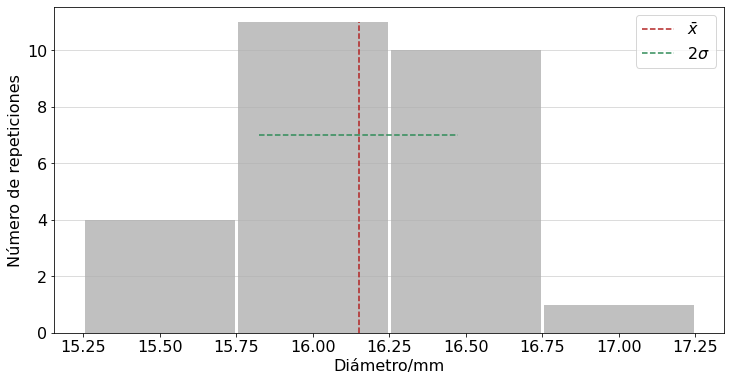

In [8]:
import numpy as np
import pylab as plt
Ds = np.array([15.40,16.00,16.15,16.10,15.85,16.35,16.20,16.30,15.95,16.15,
              16.85,16.35,16.35,16.10,16.30,16.25,16.20,15.50,16.50,16.15,
              15.45,17.00,16.40,16.50,15.90,15.65,15.55,16.60,15.70,15.30]) # en mm, incertidumbre de 0.05 mm

Ds2 = np.array([16.00,16.15,16.10,15.85,16.35,16.20,16.30,15.95,16.15,
              16.35,16.35,16.10,16.30,16.25,16.20,15.50,16.50,16.15,
              16.40,16.50,15.90,15.65,15.55,16.60,15.70,16.85]) # en mm, incertidumbre de 0.05 mm

media = np.mean(Ds2)
devS = np.std(Ds2,ddof=1)

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))
plt.hist(Ds2, bins=[15.25,15.75,16.25,16.75,17.25], rwidth=0.98,
                   color='silver',density=False,cumulative=False,align='mid')
plt.vlines(media,0,11,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(7,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
#plt.title('Diámetro de canicas')
plt.xlabel('Diámetro/mm')
plt.ylabel(r'Número de repeticiones')
plt.legend()
plt.grid(axis='y', alpha=0.55)

print('El diámetro promedio es {:.1f} mm con una desviación estándar de {:.1f} mm.'.format(media,devS))

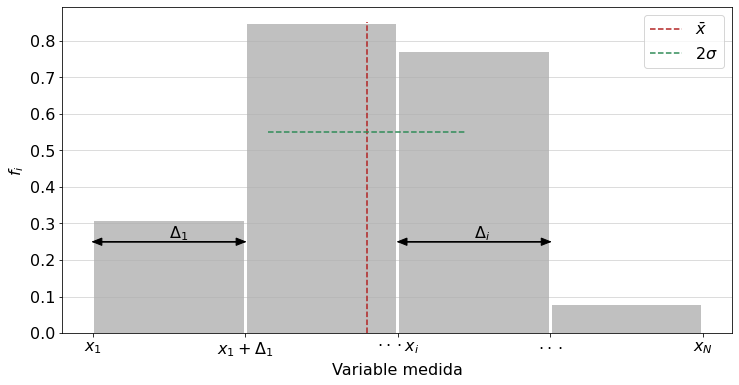

In [9]:
plt.figure(figsize=(12,6))
plt.hist(Ds2, bins=[15.25,15.75,16.25,16.75,17.25], rwidth=0.98,
                   color='silver',density=True,cumulative=False,align='mid')
plt.xlabel('Variable medida')
plt.ylabel(r'$f_i$')
plt.xticks([15.25,15.75,16.25,16.75,17.25],['$x_1$','$x_1+\Delta_1$','$\cdot\cdot\cdot x_i$','$\cdot\cdot\cdot$','$x_N$'])
plt.vlines(media,0,0.85,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(0.55,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
plt.arrow(15.25,0.25,0.5,0,length_includes_head=True,head_width=0.02,color='black')
plt.arrow(15.75,0.25,-0.5,0,length_includes_head=True,head_width=0.02,color='black')
plt.text(15.5,0.26,r'$\Delta_1$')
plt.arrow(16.25,0.25,0.5,0,length_includes_head=True,head_width=0.02,color='black')
plt.arrow(16.75,0.25,-0.5,0,length_includes_head=True,head_width=0.02,color='black')
plt.text(16.5,0.26,r'$\Delta_i$')
plt.grid(axis='y', alpha=0.55)
plt.legend()
plt.savefig('../docs/part4/imagenes/binHisto.png',format='png')
plt.show()

El segundo ejemplo consiste en medir la altura de unos estudiantes. Es un ejemplo ficticio, los valores salen de multiplicar por 10 y redondear los diámetros de los estudiantes.

El diámetro promedio es 161.6 cm con una desviación estándar de 3.3 cm.


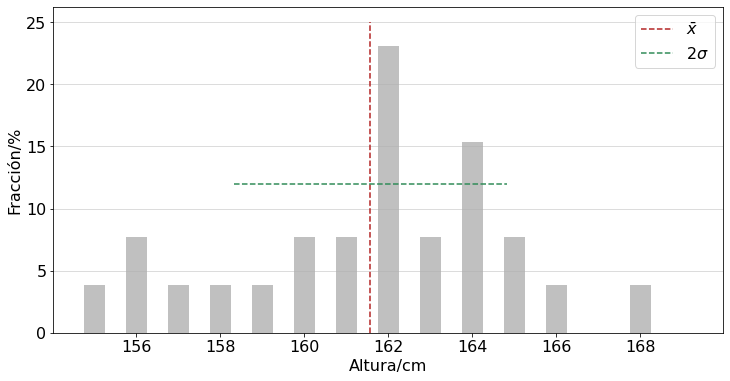

In [10]:
from collections import Counter
# Altura estudiantes en cm
Ds3 = np.array([16.00,16.15,16.10,15.85,16.35,16.20,16.30,15.95,16.15,
              16.35,16.35,16.10,16.30,16.25,16.20,15.50,16.50,16.15,
              16.40,16.50,15.90,15.65,15.55,16.60,15.70,16.85])*10
Ds3 = np.round(Ds3) # En enteros
media = np.mean(Ds3)
devS = np.std(Ds3,ddof=1)
DS = Counter(Ds3) # Determina el número de repeticiones y almacena en lista

Dm = np.arange(155,170,1) # Alturas a graficar
### Extrae un vector de repeticiones
R = []
for ii in range(len(Dm)):
    R.append(DS[Dm[ii]])
###
    
F = R/np.sum(R) # Fracciones

matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))
plt.bar(Dm,100*F,width=0.5,color='silver')
plt.vlines(media,0,25,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(12,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
#plt.title('Altura estudiantes')
plt.xlabel('Altura/cm')
plt.ylabel('Fracción/%')
plt.legend()
plt.grid(axis='y', alpha=0.55)

print('El diámetro promedio es {:.1f} cm con una desviación estándar de {:.1f} cm.'.format(media,devS))

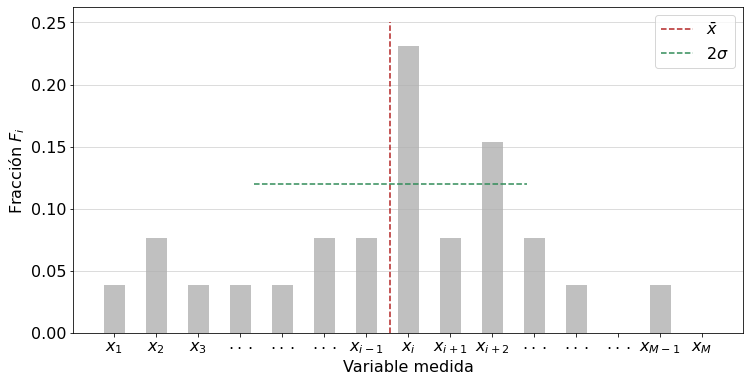

In [11]:
import matplotlib
import pylab as plt
matplotlib.rcParams.update({'font.size': 16})
plt.figure(figsize=(12,6))
plt.bar(Dm,F,width=0.5,color='silver')
plt.vlines(media,0,0.25,colors='firebrick',ls='--',label=r'$\bar x$')
plt.hlines(0.12,media-devS,media+devS,colors='seagreen',ls='--',label=r'$2\sigma$')
plt.xlabel('Variable medida')
plt.ylabel('Fracción $F_i$')
plt.xticks(Dm, ['$x_1$','$x_2$','$x_3$','$\cdot\cdot\cdot$','$\cdot\cdot\cdot$','$\cdot\cdot\cdot$','$x_{i-1}$','$x_i$',
                '$x_{i+1}$','$x_{i+2}$','$\cdot\cdot\cdot$','$\cdot\cdot\cdot$','$\cdot\cdot\cdot$','$x_{M-1}$','$x_M$'])
plt.grid(axis='y', alpha=0.55)   
plt.legend()
plt.savefig('../docs/part4/imagenes/barHisto.png',format='png')
plt.show()

### Ejemplo distribución binomial

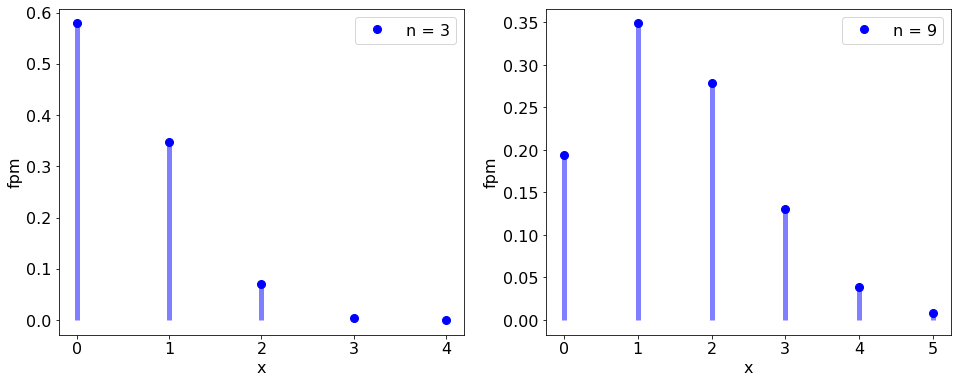

In [12]:
from scipy.stats import binom
import pylab as plt
import matplotlib
import numpy as np
matplotlib.rcParams.update({'font.size': 16})
fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(16,6))

n , p = 3 , 1/6
x = np.arange(0,5)
ax1.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label=r'n = {}'.format(n))
ax1.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax1.legend()
ax1.set_xlabel('x')
ax1.set_ylabel('fpm')

n , p = 9 , 1/6
x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.999, n, p))
ax2.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label=r'n = {}'.format(n))
ax2.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
ax2.legend()
ax2.set_xlabel('x')
ax2.set_ylabel('fpm')
plt.savefig('../docs/part4/imagenes/binom-fpm.svg',format='svg')
plt.show()

## Ejemplo histograma con N tendiendo a infinito

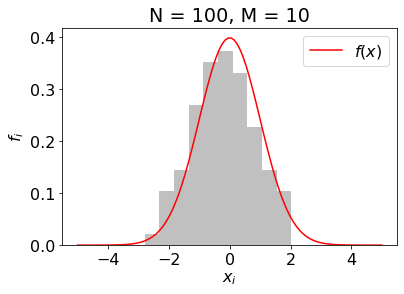

In [61]:
#### Valores a cambiar ###
##########################
N = 100    # Tamaño muestra
M = 10      # Número de intervalos
##########################

import numpy as np
import pylab as plt
from scipy.stats import norm
matplotlib.rcParams.update({'font.size': 16})

np.random.seed(0)
conjunto = np.random.normal(loc=0,scale=1,size=N)
infoHist = plt.hist(conjunto,bins=M,density=True,align='left',
                   color='silver')
x = np.linspace(-5,5,100)
plt.plot(x,norm.pdf(x,loc=0,scale=1),color='r',label=r'$f(x)$')
plt.title(r'N = {}, M = {}'.format(N,M))
plt.xlabel(r'$x_i$')
plt.ylabel(r'$f_i$')
plt.legend()
plt.show()